In [1]:
import pandas as pd

In [2]:
data=[]
with open("/content/train_data.txt","r",encoding="utf-8") as file:
  lines =file.readlines()
  for line in lines:
    parts = line.strip().split(" ::: ")
    if len(parts) == 4:
      index,title_year,genre,plot =parts
      data.append({"title":title_year.strip(),
                   "genre": genre.strip().lower(),
                   "plot": plot.strip()}
                  )


In [3]:
df=pd.DataFrame(data)
df.head()

,title,genre,plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [14]:
df.dropna(subset=['plot','genre'],inplace=True)
print("\nUnique Genres:", df['genre'].nunique())
print("Genre Counts:\n",df['genre'].value_counts())


Unique Genres: 27
Genre Counts:
 genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   54214 non-null  object
 1   genre   54214 non-null  object
 2   plot    54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [16]:
df.isnull().sum()

,0
title,0
genre,0
plot,0


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
x=df['plot']
y=df['genre']
tfidf=TfidfVectorizer(stop_words='english',max_features=5000)
x_tfidf=tfidf.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test=train_test_split(x_tfidf,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("\nModel Accuracy:", accuracy_score(y_test,y_pred))
print("\nnClassification Report:\n", classification_report(y_test,y_pred))


Model Accuracy: 0.5799133081250576

nClassification Report:
               precision    recall  f1-score   support

      action       0.51      0.25      0.34       263
       adult       0.75      0.21      0.33       112
   adventure       0.42      0.14      0.21       139
   animation       0.60      0.09      0.15       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.59      0.55      1443
       crime       0.29      0.02      0.04       107
 documentary       0.66      0.85      0.74      2659
       drama       0.54      0.78      0.64      2697
      family       0.39      0.07      0.12       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.42      0.59        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.56      0.60       431
       music       0.62      0.47      0.54       144
     musical       1.00      0.02      0.04        50
     mystery       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
def predict_genre(plot_text):
  plot_tfidf=tfidf.transform([plot_text])
  genre_pred=model.predict(plot_tfidf)[0]
  return genre_pred



In [12]:
new_plot="A superhero from another planet fights to save Earth from destruction."
print("/nPredicted Genre:", predict_genre(new_plot))

/nPredicted Genre: sci-fi


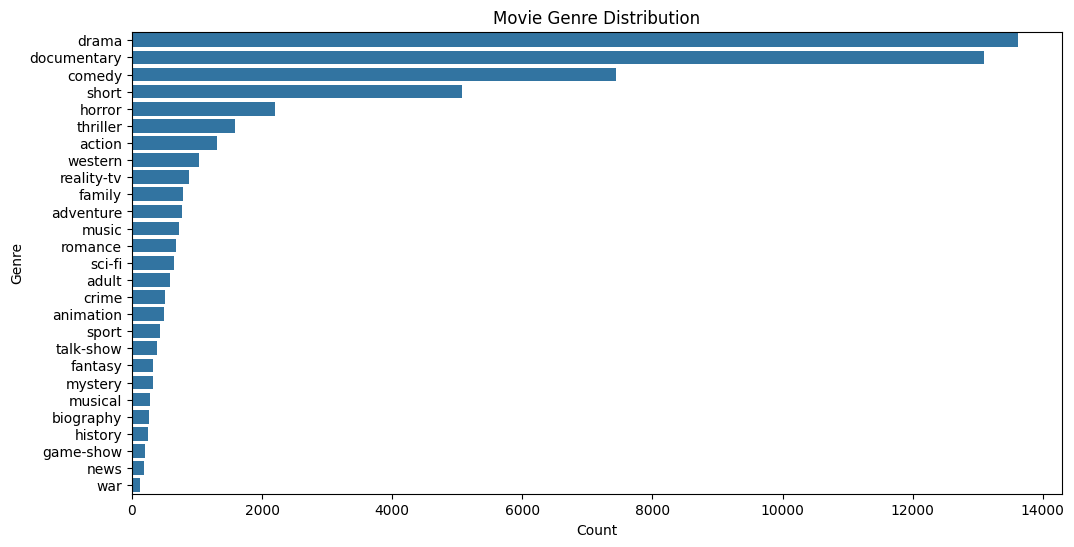

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(y='genre',data=df, order=df['genre'].value_counts().index)
plt.title("Movie Genre Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()